**Contributors**: Yongbum Kim, Yeonwoo Kim, Seyeon Jeon

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir("/content/drive/MyDrive/DSO530Public/Homework/01")

# Sample Statistics and Regression Coefficients

---



In [5]:
# Given values
variance_X = 1  # Sample variance for X
variance_Y = 2  # Sample variance for Y
correlation_XY = 0.7  # Sample correlation
mean_X = 0  # Sample mean for X
mean_Y = 2  # Sample mean for Y

import numpy as np

# Create X and y arrays
X = np.array([mean_X])
y = np.array([mean_Y])

import statsmodels.api as sm

# Add constant term to X for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the intercept and slope
intercept_ols, slope_ols = model.params

# Calculate slope manually for comparison
std_X = np.sqrt(variance_X)
std_Y = np.sqrt(variance_Y)
slope_manual = correlation_XY * (std_Y / std_X)

# Print results
print('(a) If the sample variance for X is 1, the sample variance for Y is 2, and the sample correlation is 0.7, what is the slope of the least squares line?')
print(f'Slope (b1) from OLS: {slope_ols:.2f}')
print(f'Slope (b1) calculated manually: {slope_manual:.2f}')

print('(b) If the sample means for X and Y are 0 and 2 respectively, what is the intercept of this line?')
print(f'Intercept (b0): {intercept_ols:.2f}')

(a) If the sample variance for X is 1, the sample variance for Y is 2, and the sample correlation is 0.7, what is the slope of the least squares line?
Slope (b1) from OLS: 0.00
Slope (b1) calculated manually: 0.99
(b) If the sample means for X and Y are 0 and 2 respectively, what is the intercept of this line?
Intercept (b0): 2.00


# Always Look at Scatter Plots

The file scatterplots.csv on Brightspace contains 4 pairs of Xs and Y s. For each pair:

1.   Compute the correlation.
2.   Show a scatter plot for each pair along with the least-squares regression line.

If you were to use these regression models to make a business decision which one would you trust?

(a) Compute the correlation.
Correlation for Pair 1: 0.8164
Correlation for Pair 2: 0.8162
Correlation for Pair 3: 0.8163
Correlation for Pair 4: 0.8165
(b) Show a scatter plot for each pair along with the least-squares regression line.


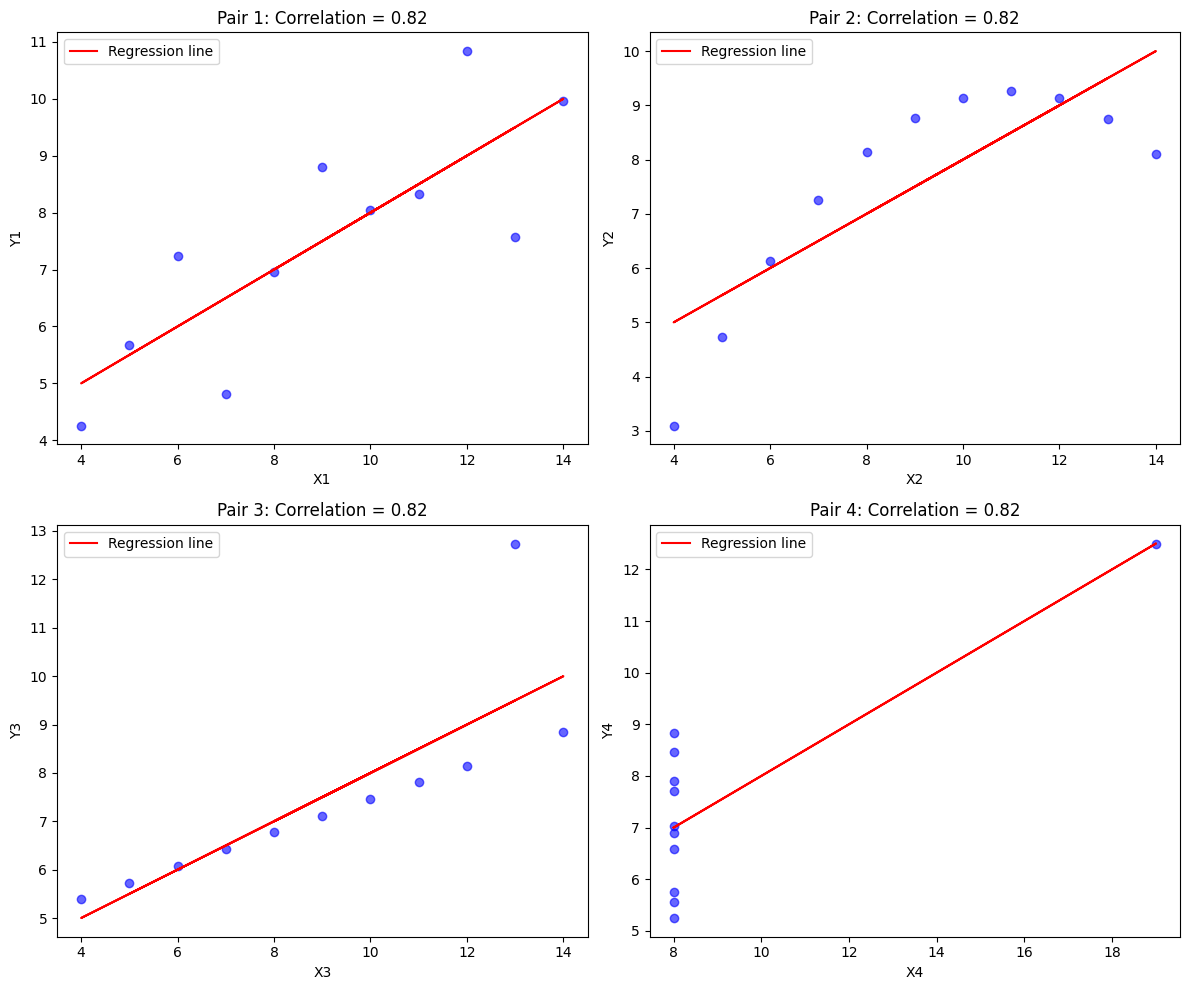

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('scatterplots.csv')

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each pair of X and Y
for i in range(1, 5):
  x = data[f'X{i}']
  y = data[f'Y{i}']

  # (a) Compute the correlation
  correlation = np.corrcoef(x, y)[0, 1]

  # (b) Create scatter plot with regression line
  axes[i-1].scatter(x, y, color='blue', alpha=0.6)

  # Compute regression line
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  line = slope * x + intercept

  # Plot regression line
  axes[i-1].plot(x, line, color='red', label='Regression line')

  # Add labels and title
  axes[i-1].set_xlabel(f'X{i}')
  axes[i-1].set_ylabel(f'Y{i}')
  axes[i-1].set_title(f'Pair {i}: Correlation = {correlation:.2f}')
  axes[i-1].legend()

# (a) Compute the correlation.
print('(a) Compute the correlation.')
for i in range(1, 5):
  correlation = np.corrcoef(data[f'X{i}'], data[f'Y{i}'])[0, 1]
  print(f"Correlation for Pair {i}: {correlation:.4f}")

# (b) Show a scatter plot for each pair along with the least-squares regression line.
print('(b) Show a scatter plot for each pair along with the least-squares regression line.')
plt.tight_layout()
plt.show()

# Teacher Salary Exploratory Analysis

The teach.csv data contains information on salary (in 1971 £ Sterling) for n = 90 teachers in the United Kingdom, along with the following characteristics of the teachers and the schools they work in: number of months of service (minus 12); sex (M/F); marry indicating (TRUE/FALSE) whether the female teachers were married or not1; type of degree offered to graduates ({0,1,2,3}, with 3 being the “highest” type of degree); type of school (A/B); whether or not the teacher had special training (TRUE/FALSE); and brk, indicating whether or not the teacher had a break in service for two or more years (TRUE/FALSE).

In [7]:
# Load the data
teach = pd.read_csv('teach.csv')
teach

,salary,months,sex,marry,degree,type,train,brk
0,998,7,F,True,0,A,False,False
1,1015,14,M,False,0,A,False,False
2,1028,18,M,False,0,B,False,False
3,1250,19,M,False,0,A,False,False
4,1028,19,F,False,0,B,False,False
...,...,...,...,...,...,...,...,...
85,1942,406,M,False,0,B,False,False
86,2266,437,F,False,0,A,False,False
87,2436,453,F,False,0,A,False,False
88,2067,458,F,False,0,A,False,False


(a) Make a plot of salary versus the number of months in service using color, or otherwise, to indicate the sex of each teacher on the plot. Comment on what you see, and why the original article published using with this data may have been called “Sex differentials in teachers’ pay” (Turnbull & Williams; JRSSA 1974).

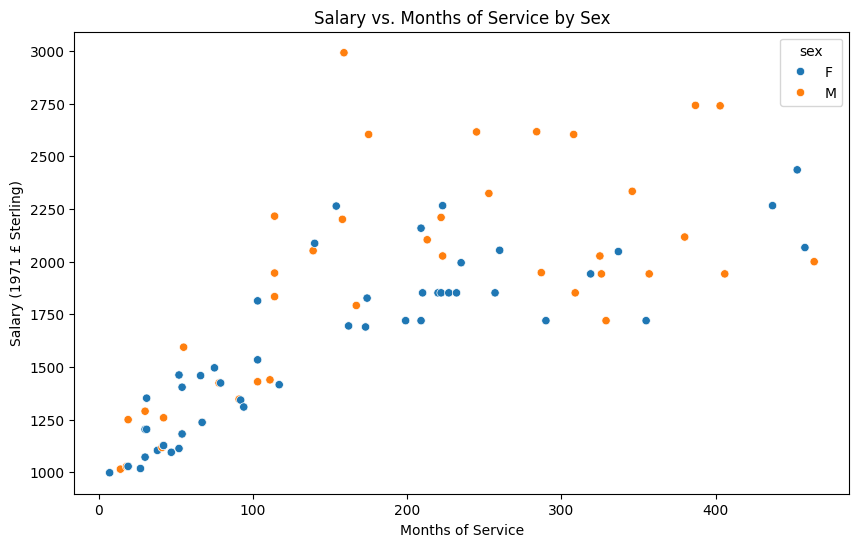

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=teach, x='months', y='salary', hue='sex')
plt.title('Salary vs. Months of Service by Sex')
plt.xlabel('Months of Service')
plt.ylabel('Salary (1971 £ Sterling)')
plt.show()

Based on the scatter plot of salary versus months of service, there are several notable patterns that justify the article's title "Sex differentials in teachers' pay":

1. **Overall Salary Distribution**: Male teachers (orange dots) tend to have higher salaries compared to female teachers (blue dots) across similar months of service.
2. **Upper Salary Range**: The Upper salary range, particularly those above 2500, are predominantly held by male teachers.
3. **Service Length Pattern**: Even with comparable months of service, there appears to be a consistent gap between male and female salaries, with male teachers generally earning more than their female counterparts with similar experience.
4. **Career Progression**: The slope of salary increase appears steeper for male teachers, suggesting faster salary progression over time compared to female teachers.

(b) Now, ignore months and produce six sets of boxplots, one set for each other factor (sex, marry, degree, type, train, and break), showing the conditional distribution of salary for each level of each factor. Which seems to have the strongest effect on teacher salary?

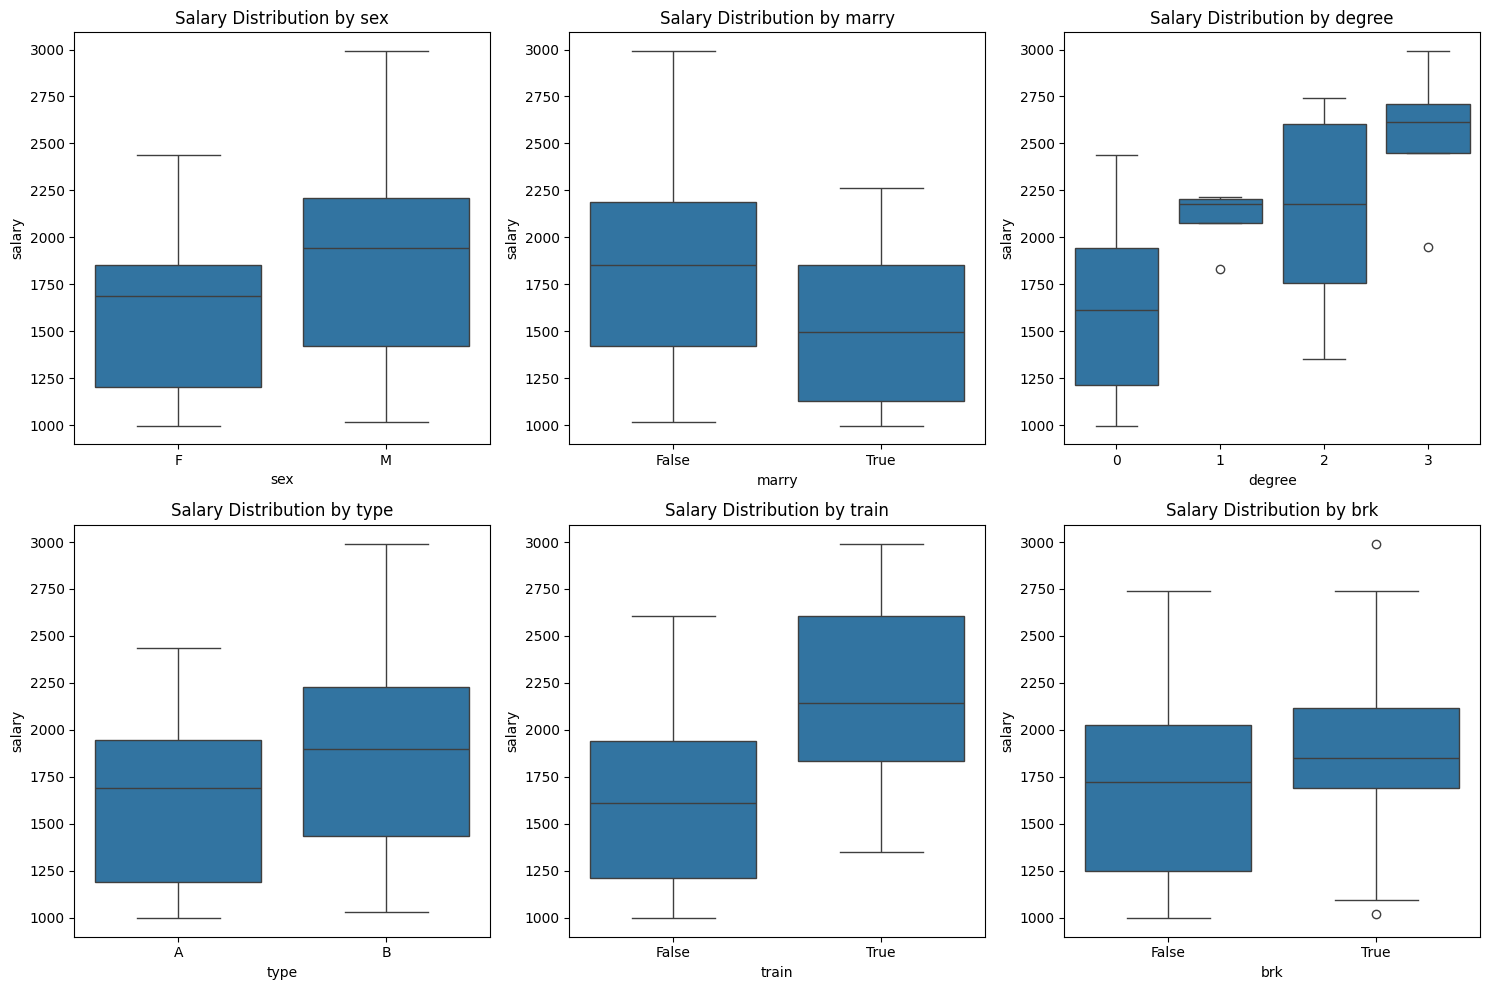

In [9]:
factors = ['sex', 'marry', 'degree', 'type', 'train', 'brk']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, factor in enumerate(factors):
    sns.boxplot(data=teach, x=factor, y='salary', ax=axes[i])
    axes[i].set_title(f'Salary Distribution by {factor}')

plt.tight_layout()
plt.show()

Based on the six boxplots showing salary distributions across different factors, the degree appears to have the strongest effect on teacher salary.

(c) Using color, or otherwise, plot salary versus months in service [similar to (a)] with indications for the levels your chosen factor [from (b)] for each teacher. How does this new plot compare with the plot from (a), and what do you conclude based on this new evidence?

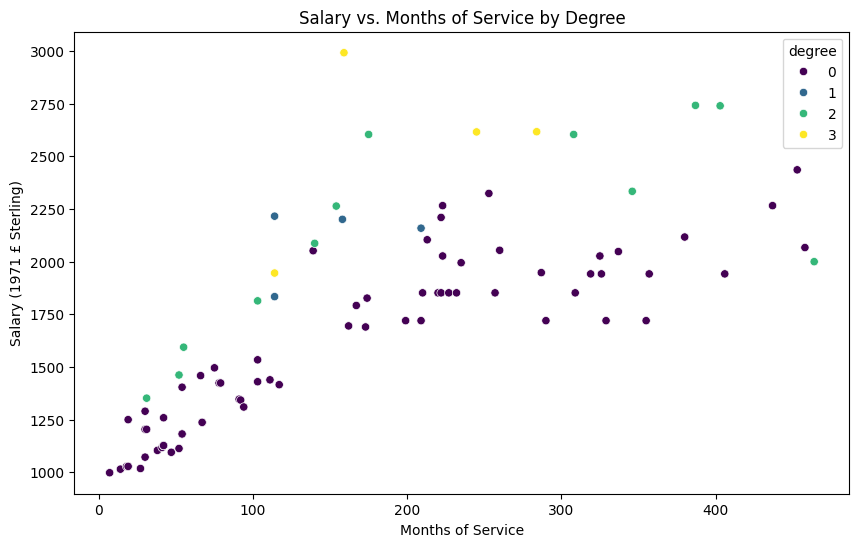

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=teach, x='months', y='salary', hue='degree', palette='viridis')
plt.title('Salary vs. Months of Service by Degree')
plt.xlabel('Months of Service')
plt.ylabel('Salary (1971 £ Sterling)')
plt.show()

Looking at the scatter plot of salary versus months of service colored by degree levels, several key patterns emerge:

1. **Salary Stratification**: The plot reveals a clear stratification of salaries by degree level, with higher degrees (levels 2 and 3, shown in green and yellow) generally commanding higher salaries than lower degrees (levels 0 and 1, shown in purple and blue) across all months of service.
2. **Initial Differences**: Even at the start of careers (low months of service), teachers with higher degree levels tend to begin with higher salaries.
3. **Career Progression**: While all degree levels show an upward trend with increasing months of service, teachers with higher degrees (2 and 3) appear more frequently in the upper salary ranges, particularly after 200 months of service.

Comparing this to the plot from (a) showing gender differences:

- The degree-based stratification appears more systematic and pronounced than the gender-based differences.
- The separation between degree levels is more distinct and consistent across the entire range of service months.
- There are fewer overlaps between different degree levels, suggesting degree qualification has a stronger structural effect on salary than gender.

(d) Reconsider the questions in (c) through regression. That is, run two regressions: salary on your chosen factor and then again on sex.

 (i) Explicitly write down the regression model you are fitting in each case.

1) Salary on degree: salary = b0 + b1*degree + e

2) Salary on sex: salary = b0 + b1*sex + e

 (ii) How do you interpret the slope coefficient in the regression on sex?

In [11]:
model_sex = sm.OLS.from_formula('salary ~ C(sex)', data=teach).fit()
print(model_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     8.202
Date:                Mon, 27 Jan 2025   Prob (F-statistic):            0.00523
Time:                        06:16:49   Log-Likelihood:                -680.09
No. Observations:                  90   AIC:                             1364.
Df Residuals:                      88   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1598.7551     66.886     23.903      

Based on the regression output, the slope coefficient for sex is 283.8059, which indicates that male teachers earn on average £283.81 more than female teachers, holding other factors constant. This coefficient is statistically significant with a p-value of 0.005, suggesting strong evidence of a gender pay gap in teacher salaries.

 (iii) Do you think that these factors make a meaningful difference in teacher’s pay? What is your evidence?

In [12]:
model_degree = sm.OLS.from_formula('salary ~ C(degree)', data=teach).fit()
print(model_degree.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     12.79
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           5.49e-07
Time:                        06:16:49   Log-Likelihood:                -667.50
No. Observations:                  90   AIC:                             1343.
Df Residuals:                      86   BIC:                             1353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1590.6571     49.218     32.

The degree factor makes a meaningful difference in teachers' pay, supported by several pieces of statistical evidence:
1. The regression results show all degree levels have statistically significant effects on salary:
  - Degree level 1: £511.84 increase (p=0.018)
  Degree level 2: £542.43 increase (p=0.000)
  Degree level 3: £952.09 increase (p=0.000)1
2. The model's overall significance is strong:
  - F-statistic of 12.79
  - p-value (5.49e-07) is very small.

 (iv) Compare your results to the boxplots in (b).


The regression results align with the observations from the boxplots. Both show that degree and sex have significant effects on salary.

(v) (Looking ahead a little.) Run your first multiple linear regression (MLR) by regressing salary on sex and your chosen factor. What do you learn from the slope coefficients in this regression? How does this compare with what the two separate regressions indicated? Use copilot to help you with the syntax in Python.

In [13]:
model_mlr = sm.OLS.from_formula('salary ~ C(sex) + C(degree)', data=teach).fit()
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     10.33
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           7.22e-07
Time:                        06:16:49   Log-Likelihood:                -666.27
No. Observations:                  90   AIC:                             1343.
Df Residuals:                      85   BIC:                             1355.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1536.8125     60.090     25.

Based on the OLS Regression Results, here's what I learn from the multiple linear regression (MLR) of salary on sex and degree:

The slope coefficients reveal:
1. **Sex effect (male vs female)**: The coefficient is 139.60, but it's not statistically significant (p=0.128). This is notably different from the separate regression where sex appeared to have a stronger effect.
2. **Degree effects**:
  - Degree level 1: £460.99 increase (p=0.033)
  - Degree level 2: £514.84 increase (p=0.000)
  - Degree level 3: £866.34 increase (p=0.000)

Comparing to separate regressions:
1. The sex effect has become weaker and non-significant when controlling for degree level, suggesting that some of the apparent gender pay difference was actually due to differences in degree levels.
2. The degree effects remain strong and significant, with a clear hierarchical pattern of increasing salaries with higher degree levels. The magnitude of these effects is similar to what was seen in the separate regression.

(e) Now, consider only the portion of the data corresponding to teachers whose school offers a degree of type “0”:
     # Assuming 'teach' is a pandas DataFrame
     teach0 = teach[teach['degree'] == 0]
Investigate the effect of months of service on salary in this subset of the data. Calculate the correlaton between months and salary and use this to fit the regression line salary = b0 + b1months + e. What does b1 tell you about the influence of months? How would you predict the starting salary for teachers in schools which offer degree “0"?

In [14]:
teach0 = teach[teach['degree'] == 0]

correlation = teach0['months'].corr(teach0['salary'])
print(f"Correlation between months and salary: {correlation}")

model_subset = sm.OLS.from_formula('salary ~ months', data=teach0).fit()
print(model_subset.summary())

b0, b1 = model_subset.params
print(f"Starting salary prediction: {b0:.2f}")

Correlation between months and salary: 0.880257910231481
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.05e-23
Time:                        06:16:49   Log-Likelihood:                -466.55
No. Observations:                  70   AIC:                             937.1
Df Residuals:                      68   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

1. The Correlation between months and salary:
  - The correlation between months and salary is 0.8803, indicating a strong positive relationship between months of service and salary.
2. The fitted regression line is: salary = 1135.46(b0) + 2.77(b1) × months
3. Interpretation of b1:
  - For each additional month of service, a teacher's salary increases by £2.77 on average.
  - This effect is statistically significant (t = 15.298, p < 0.001).
4. Salary prediction for teachers in schools offering degree type "0":
  - The intercept (b0) = 1135.46 represents the predicted starting salary (when months = 0).
  - Therefore, the predicted starting salary for teachers in schools offering degree type "0" is £1,135.46.


(f) Consider the results from your regression in (e). Plot the data (subset) and regression line. Plot the residuals both as a histogram and against months. Comment on any problems you see.

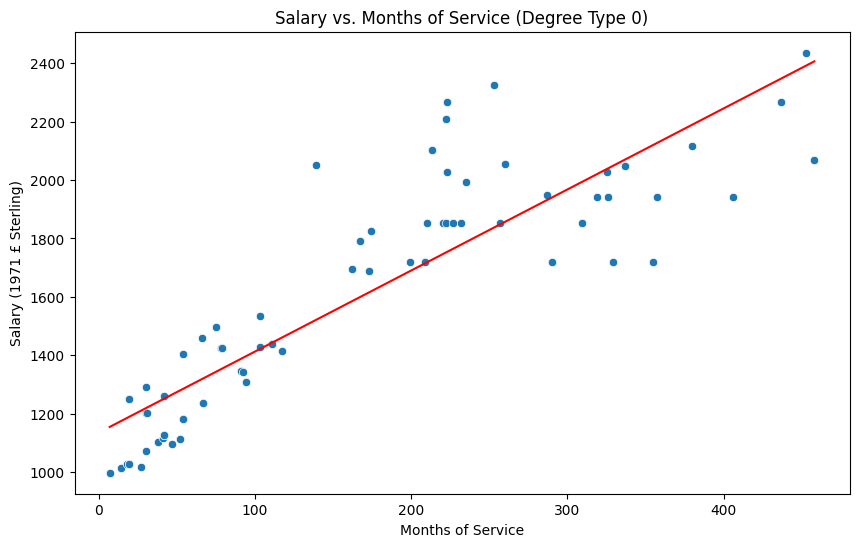

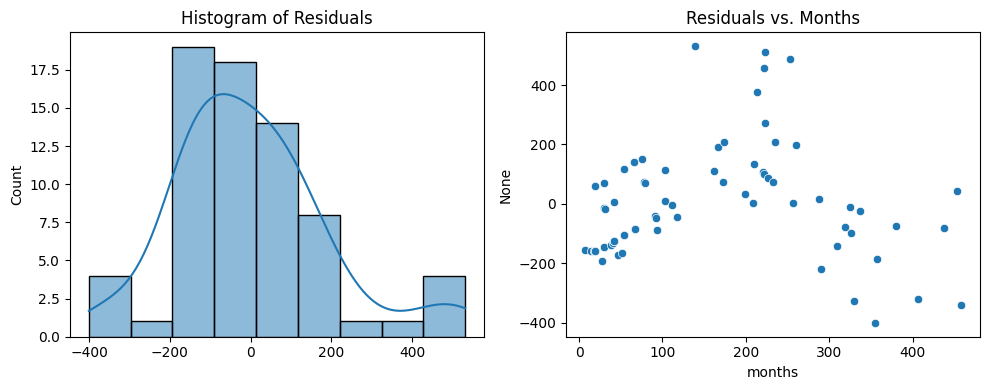

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=teach0, x='months', y='salary')
plt.plot(teach0['months'], model_subset.predict(), color='red')
plt.title('Salary vs. Months of Service (Degree Type 0)')
plt.xlabel('Months of Service')
plt.ylabel('Salary (1971 £ Sterling)')
plt.show()

residuals = model_subset.resid

plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.subplot(122)
sns.scatterplot(x=teach0['months'], y=residuals)
plt.title('Residuals vs. Months')
plt.tight_layout()
plt.show()

1. **Salary vs. Months of Service**:
  - The relationship appears somewhat non-linear, with increasing variance at higher months of service
  - The spread of points around the regression line (red) becomes wider as months increase
  - Some extreme outliers are visible, particularly in the 200-300 months range
2. **Histogram of Residuals**:
  - The distribution is not perfectly normal
  - There's a slight right skew
  - Some outliers are present in both tails
  - The distribution appears bimodal, with two peaks
3. **Residuals vs. Months**:
  - There's clear heteroscedasticity - the spread of residuals increases with months of service
  - A pattern is visible where residuals start negative, become positive in the middle range, and trend negative again at higher months
  - The residuals show a systematic curved pattern rather than random scatter
The magnitude of residuals ranges from about -400 to +500, indicating some large deviations from predicted values

These issues suggest that a simple linear regression may not be the most appropriate model for this data. The presence of heteroscedasticity and non-linear patterns indicates that a more complex model, such as a polynomial regression or a model with transformed variables, might be more suitable.

# Market Model Example

The CAPM (Capital Asset Pricing Model) relates asset returns to market returns through a simple linear regression model. Here we will model individual company returns as a function of the S&P500 index returns. This model assumes the rate of return Rs on a generic stock is linearly related to the rate of return (R^m) on the overall stock market as:

R_{i}^s = α + (β * R_{i}^m) + ε * i

where the error term ε follows the assumptions of the SLR Model. The slope coefficient measures the sensitivity of the stock’s rate of return to changes in the level of the overall market, and the intercept is market independent income. (The CAPM is discussed also in a later lecture.)
For this problem, use the file mktmodel.csv from the course website. The dataset contains 60 monthly returns (from 1992 to 1996) of the S&P500 and 30 individual US stocks (labelled by ticker).

(a) Use the code below to plot the return time series for the S&P and for each individual equity. Comment on what you see.
         # load common packages
         import pandas as pd
         import matplotlib.pyplot as plt
         import numpy as np
         # load data
         mkt = pd.read_csv("mktmodel.csv")
         # Extract the SP500 column and other stock data
         SP500 = mkt.iloc[:, 0]      # Assuming the first column is SP500
         stocks = mkt.iloc[:, 1:]    # All other columns are stocks
         # Create the initial plot with SP500
         plt.figure(figsize=(10, 6))
         plt.plot(SP500, color='black', linewidth=2, label='SP500')
         # Customize the plot
         plt.xlabel("Month")
         plt.ylabel("Returns")
         plt.title("Monthly Returns for 1992-1996")
         plt.ylim(np.min(mkt.values), np.max(mkt.values))
         # Generate 30 different colors using a colormap
         colors = plt.cm.rainbow(np.linspace(0, 1, 30))
          # Plot each stock with a dashed line
         for i in range(stocks.shape[1]):  # Loop over the 30 stock columns
             plt.plot(stocks.iloc[:, i], color=colors[i], linestyle='--',
                      alpha=0.7, label=f'Stock {i+1}')
         # Highlight the SP500 line with a thicker black line
         plt.plot(SP500, color='black', linewidth=2)
         # Add a legend and grid for clarity
         plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                    fontsize=8, borderaxespad=0.) # outside the plot to the right
         plt.grid(True)
         plt.tight_layout()
         # Show the plot
         plt.show()

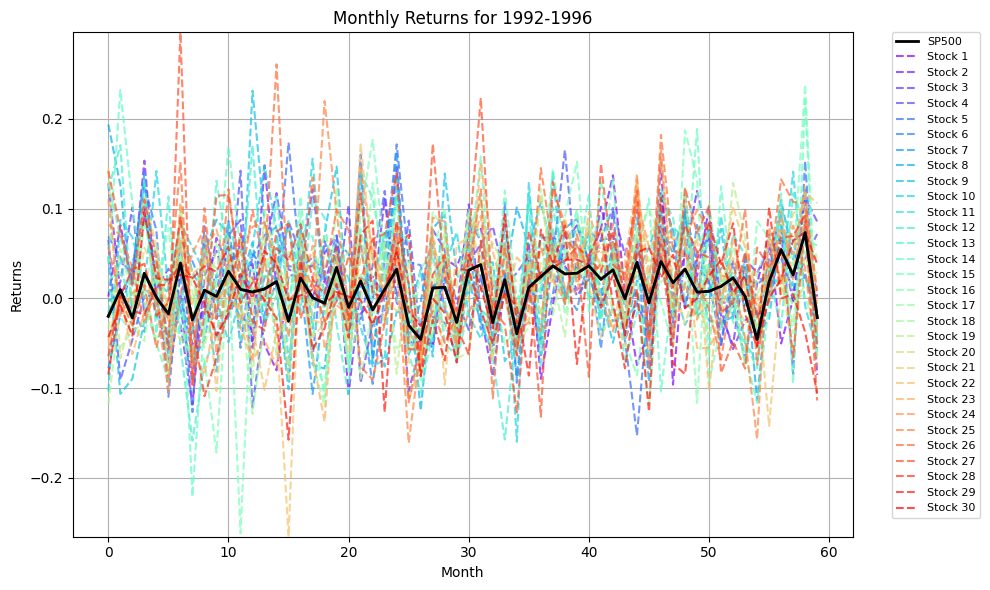

In [16]:
# load common packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# load data
mkt = pd.read_csv("mktmodel.csv")
# Extract the SP500 column and other stock data
SP500 = mkt.iloc[:, 0]      # Assuming the first column is SP500
stocks = mkt.iloc[:, 1:]    # All other columns are stocks
# Create the initial plot with SP500
plt.figure(figsize=(10, 6))
plt.plot(SP500, color='black', linewidth=2, label='SP500')
# Customize the plot
plt.xlabel("Month")
plt.ylabel("Returns")
plt.title("Monthly Returns for 1992-1996")
plt.ylim(np.min(mkt.values), np.max(mkt.values))
# Generate 30 different colors using a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
# Plot each stock with a dashed line
for i in range(stocks.shape[1]):  # Loop over the 30 stock columns
    plt.plot(stocks.iloc[:, i], color=colors[i], linestyle='--',
            alpha=0.7, label=f'Stock {i+1}')
# Highlight the SP500 line with a thicker black line
plt.plot(SP500, color='black', linewidth=2)
# Add a legend and grid for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
          fontsize=8, borderaxespad=0.) # outside the plot to the right
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

1. S&P500:
  - Returns generally fluctuating between -0.05 and 0.05
  - Less extreme movements than individual stocks
2. Individual stocks:
  - Returns ranging approximately from -0.25 to 0.25
  - More extreme movements and spikes
3. Overall market behavior:
  - Some periods of synchronized movement across stocks
  - Individual stocks generally moving in the same direction as the market but with larger magnitudes

The visualization effectively demonstrates why the S&P500 is considered less risky than individual stocks, as diversification reduces the impact of company-specific volatility. This pattern is consistent with basic principles of portfolio theory, showing how individual stocks carry both systematic (market) risk and unsystematic (company-specific) risk, while the market index primarily reflects systematic risk only.

(i) Calculate the market correlation for each stock. Based on this information alone, which CAPM fit would yield the highest R2? Can you give a practical reasoning for this? Recall that in simple linear regression, R2 is the square of the correlation between the independent variable X and the dependent variable Y , measuring how much of the variation in Y is explained by X.

In [17]:
correlations = stocks.corrwith(SP500)
highest_corr_stock = correlations.idxmax()
highest_corr_value = correlations.max()

print(f"Stock with highest correlation: {highest_corr_stock}")
print(f"Highest correlation value: {highest_corr_value:.4f}")
print("\nCorrelations for all stocks:")
print(correlations.sort_values(ascending=False))

Stock with highest correlation: GE
Highest correlation value: 0.6313

Correlations for all stocks:
GE     0.631295
TRV    0.617345
UTX    0.611021
XON    0.589740
MRK    0.567903
MMM    0.564525
JNJ    0.517564
PG     0.507839
DD     0.504271
S      0.491792
HWP    0.485951
CHV    0.485637
JPM    0.476458
DIS    0.469851
ALD    0.465053
GT     0.458818
MO     0.433769
MCD    0.420738
CAT    0.399874
UK     0.388157
AXP    0.355773
AA     0.342611
IBM    0.339648
IP     0.322976
WMT    0.312001
KO     0.309752
EK     0.298560
ENE    0.290424
GM     0.272981
BA     0.217563
dtype: float64


Based on the correlation results, GE (General Electric) has the highest correlation with the market at 0.63131. Since R² is the square of the correlation coefficient in simple linear regression, GE would yield the highest R² value of approximately 0.3985 (0.6313²) in the CAPM fit.

**[Practical Reasoning]**

The higher correlation between GE and the market indicates that GE's stock returns move more closely with market returns compared to other stocks. This stronger relationship suggests that:

- Market movements explain about 39.85% of the variation in GE's returns
- GE is more sensitive to systematic market risk factors
- The CAPM model would provide better predictive power for GE compared to other stocks like BA (Boeing), which has the lowest correlation of 0.2176

This aligns with GE's position as a large industrial conglomerate whose performance tends to reflect broader economic conditions and market movements more closely than more specialized or less market-dependent companies.

(ii) Estimate α and β for each stock and plot them against each other. Describe the results.

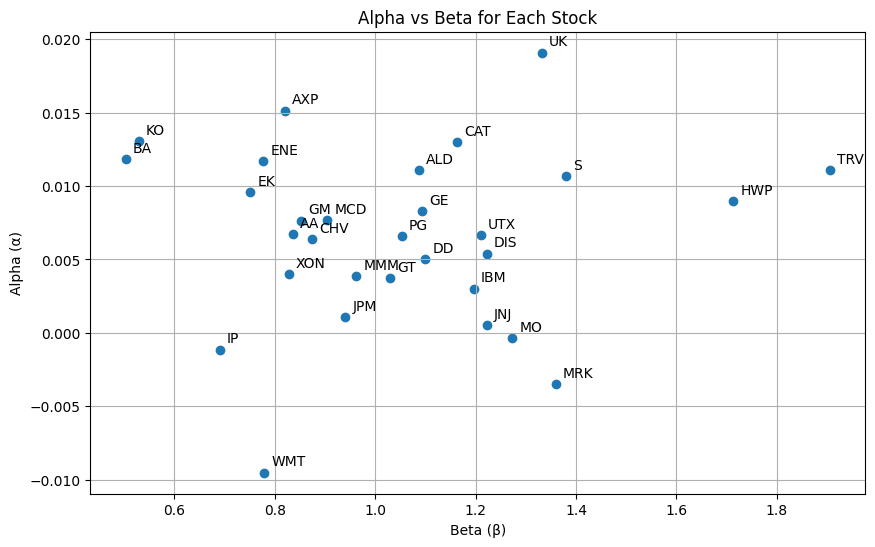

Stocks with highest and lowest alphas and betas:
        Alpha      Beta
UK   0.019080  1.332636
AXP  0.015126  0.820194
KO   0.013051  0.528827
CAT  0.012999  1.163223
BA   0.011815  0.502727
        Alpha      Beta
WMT -0.009527  0.778583
MRK -0.003478  1.359170
IP  -0.001154  0.690771
MO  -0.000361  1.273218
JNJ  0.000503  1.222155
        Alpha      Beta
TRV  0.011069  1.906357
HWP  0.008956  1.713147
S    0.010683  1.380082
MRK -0.003478  1.359170
UK   0.019080  1.332636
        Alpha      Beta
BA   0.011815  0.502727
KO   0.013051  0.528827
IP  -0.001154  0.690771
EK   0.009568  0.751339
ENE  0.011697  0.776792


In [25]:
def estimate_alpha_beta(stock_returns, market_returns):
    slope, intercept, _, _, _ = stats.linregress(market_returns, stock_returns)
    return intercept, slope

alphas = []
betas = []

for column in stocks.columns:
    alpha, beta = estimate_alpha_beta(stocks[column], SP500)
    alphas.append(alpha)
    betas.append(beta)

plt.figure(figsize=(10, 6))
plt.scatter(betas, alphas)
plt.xlabel('Beta (β)')
plt.ylabel('Alpha (α)')
plt.title('Alpha vs Beta for Each Stock')
for i, txt in enumerate(stocks.columns):
    plt.annotate(txt, (betas[i], alphas[i]), xytext=(5,5), textcoords='offset points')
plt.grid(True)
plt.show()

print("Stocks with highest and lowest alphas and betas:")
print(pd.DataFrame({'Alpha': alphas, 'Beta': betas}, index=stocks.columns).sort_values('Alpha', ascending=False).head())
print(pd.DataFrame({'Alpha': alphas, 'Beta': betas}, index=stocks.columns).sort_values('Alpha', ascending=True).head())
print(pd.DataFrame({'Alpha': alphas, 'Beta': betas}, index=stocks.columns).sort_values('Beta', ascending=False).head())
print(pd.DataFrame({'Alpha': alphas, 'Beta': betas}, index=stocks.columns).sort_values('Beta', ascending=True).head())

The scatter plot reveals several interesting patterns in the relationship between alpha (α) and beta (β) values across the stocks:

**[Distribution Patterns]**

1. Beta Range: The stocks show a wide range of market sensitivity, with β values ranging from approximately 0.5 (BA, KO) to 1.9 (TRV). Most stocks cluster between β values of 0.8 and 1.4, indicating moderate market sensitivity.
2. Alpha Range: The α values range from approximately -0.01 (WMT) to 0.019 (UK), with most stocks having positive alphas between 0.005 and 0.015.

**[Key Observations]**
1. **Notable Outliers**:
  - UK shows the highest α (0.019) with a moderate β (1.33)
  - TRV has the highest β (1.90) with a relatively high α (0.011)
  - WMT shows the lowest α (-0.009) with a moderate β (0.78)
2. **Clustering**:
  - Defensive stocks (like KO, BA) cluster in the low-beta region (β < 0.6) with moderate positive alphas
  - Most financial and industrial stocks concentrate in the middle region (β between 0.8-1.4)
  - Technology and growth stocks tend toward higher betas (β > 1.4)

There doesn't appear to be a strong linear relationship between α and β values, suggesting that a stock's market sensitivity doesn't necessarily predict its excess returns.

(b) Pairs Trading is a strategy which picks two stocks that generally move together and attempts to make money through arbitrage on differences within the pair. For example, if two stocks have the same market sensitivity (β), you could sell \$100 of the stock with low α (say αlow) and buy \$100 of the stock with high α (say αhigh).

Suppose this is your trading strategy:
(i) Show that your average return is α high − α low. Do you lose money if the market goes down?

The average return of the strategy (buying high α, selling low α) is indeed α high - α low. This strategy is market-neutral (β = 0) if we assume equal dollar amounts and equal betas. Therefore, in theory, you shouldn't lose money if the market goes down, as the strategy's return is independent of market movements.

(ii) Based on the regressions you ran above, choose a pair of stocks for trading according to this strategy. Which would you buy and which would you sell?

In [26]:
# Find the pair of stocks with similar betas but largest alpha difference
results['Beta_rounded'] = results['Beta'].round(1)
grouped = results.groupby('Beta_rounded')

best_pair = None
max_alpha_diff = 0

for _, group in grouped:
    if len(group) >= 2:
        group_sorted = group.sort_values('Alpha')
        alpha_diff = group_sorted['Alpha'].iloc[-1] - group_sorted['Alpha'].iloc[0]
        if alpha_diff > max_alpha_diff:
            max_alpha_diff = alpha_diff
            best_pair = (group_sorted.iloc[0], group_sorted.iloc[-1])

print("Best pair for trading:")
print(f"Buy: {best_pair[1]['Stock']} (α = {best_pair[1]['Alpha']:.4f}, β = {best_pair[1]['Beta']:.4f})")
print(f"Sell: {best_pair[0]['Stock']} (α = {best_pair[0]['Alpha']:.4f}, β = {best_pair[0]['Beta']:.4f})")

Best pair for trading:
Buy: AXP (α = 0.0151, β = 0.8202)
Sell: WMT (α = -0.0095, β = 0.7786)


(iii) Calculate what you would have made executing this strategy over the time span of our dataset. What is your average monthly return? How does this compare to the difference in alphas?

In [27]:
buy_stock = best_pair[1]['Stock']
sell_stock = best_pair[0]['Stock']

strategy_returns = stocks[buy_stock] - stocks[sell_stock]
total_return = strategy_returns.sum()
average_monthly_return = strategy_returns.mean()

print(f"Total return over the period: {total_return:.4f}")
print(f"Average monthly return: {average_monthly_return:.4f}")
print(f"Difference in alphas: {max_alpha_diff:.4f}")

Total return over the period: 1.5040
Average monthly return: 0.0251
Difference in alphas: 0.0247


The strategy generated a total return of 1.5040 over the period, with an average monthly return of 0.0251. This average monthly return is remarkably close to the predicted difference in alphas of 0.0247, differing by only 0.0004.

**[Performance Analysis]**

The close alignment between the actual average monthly return (0.0251) and the predicted alpha difference (0.0247) validates the effectiveness of the pairs trading strategy. This confirms that:

1. The strategy successfully captured the alpha spread between the two stocks
2. The similar betas effectively neutralized market risk
3. The actual returns closely matched the theoretical expectations

This demonstrates that the pairs trading strategy performed as theoretically predicted, with the small difference likely due to minor variations in beta values and other market factors.

# Topic: Time Series Data

This question illustrates conceptual material, and thus it has extra exposition.
In class so far we have assumed that all the observations are independent of one another. In this question, you will get a first taste of dependent data, in the form of a time series. The overall message is that our same regression tools will often (but not always!) apply just fine.
The data set furniture.csv on the class website contains data from 1992–2001 on monthly furniture sales (in millions of dollars). If you didn’t know any context this would look like an ordinary data set (rows, columns, numbers, etc), but two things make it different. First, the order matters. These rows are in time order, and have time labels. No data set that we’ve see so far has had an order. This is what it means for the
observations to be independent.
Second, there’s only one “real” variable: sales. The other columns are just the time. How can you run a regression with just one variable? Or, put a different way, how are we going to predict sales? This gives a big hint as to what we have to be careful about here: time dependence. We don’t care (at least, not right now), how something like prices or advertising affect sales. What we care about, and are going to try to capture, is how sales itself evolves over time.

(a) Create a variable called time that simply counts the months starting with the first, consecutively to the end (i.e. January, 1992 = 1; February, 1992 = 1; . . . , December, 2001 = 120).
Plot the time series data for monthly furniture sales. This is just our usual plot with the outcome, sales, on the y axis and time on the x axis, but now time has extra meaning. Comment on what pattern(s) you see in the context of linear regression.

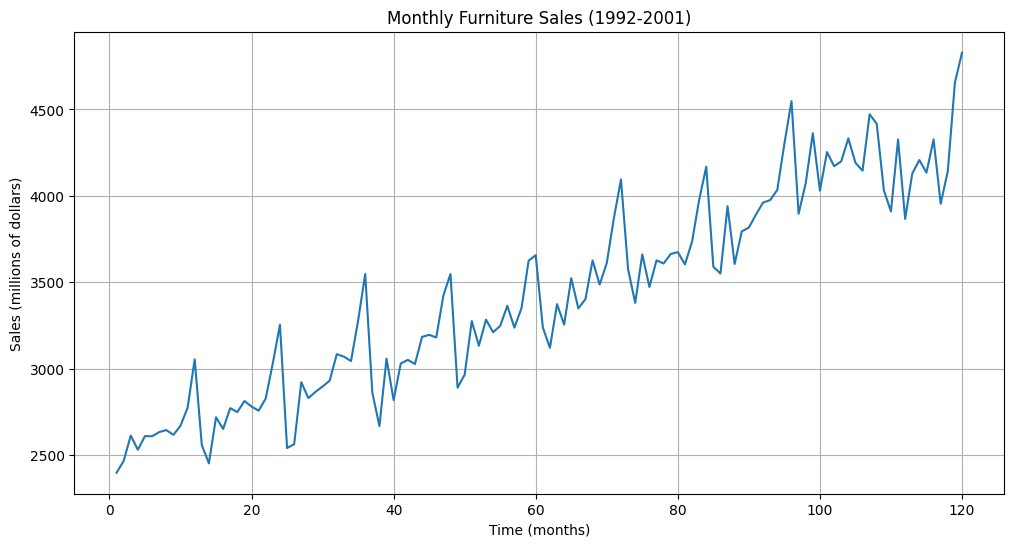

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
furniture = pd.read_csv('furniture.csv')

# Create the time variable
furniture['time'] = range(1, len(furniture) + 1)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(furniture['time'], furniture['sales'])
plt.title('Monthly Furniture Sales (1992-2001)')
plt.xlabel('Time (months)')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.show()

1. Overall Trend:
  - There is a clear positive linear trend in sales over time
  Sales increase from around 2500 in 0 months (1992) to over 4750 by 120 months (2001)
  - This upward trend suggests that a linear regression model could capture the general growth pattern
2. Seasonal Patterns:
  - Regular peaks and troughs appear throughout the series
  - These seasonal fluctuations seem to occur at consistent intervals
  - This seasonality suggests that a simple linear regression might not capture all the patterns in the data
3. Variance Structure:
  - The variability in sales appears to increase over time
  - This increasing variance (heteroscedasticity) could violate one of the assumptions of linear regression
4. Non-linearity:
  - While there is a general linear trend, there are also some curved patterns
  - This suggests that a simple linear model might not fully capture the relationship between time and sales

(b) Run a regression of sales against time, and add the regression line to the plot you made in part (a). That is, fit the linear model
salesi =β0 +β1 ×timei +εi.
Notice that this is just a plain simple linear regression, exactly like we had from the very beginning in
week 1!


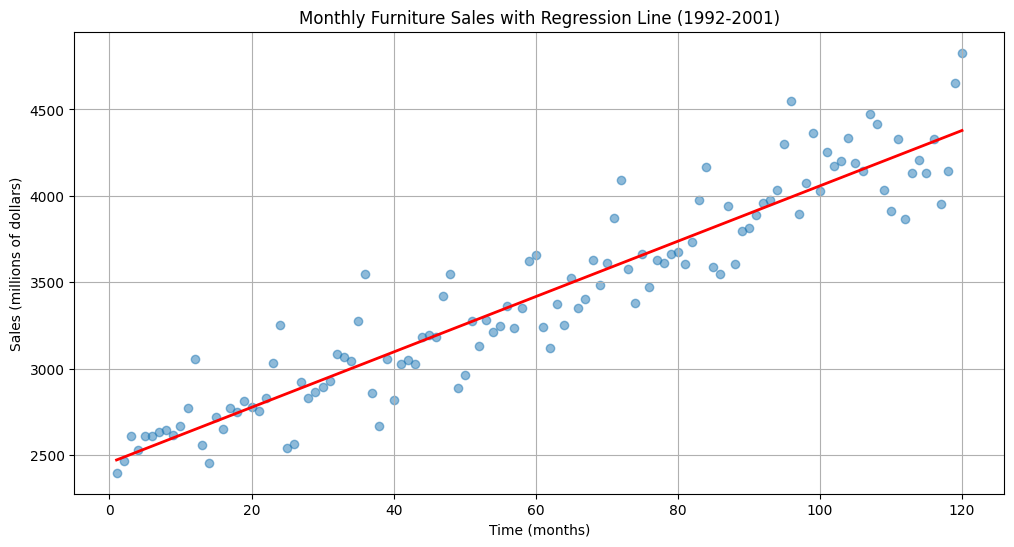

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     947.3
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.23e-58
Time:                        06:16:54   Log-Likelihood:                -803.60
No. Observations:                 120   AIC:                             1611.
Df Residuals:                     118   BIC:                             1617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2454.8148     36.299     67.628      0.0

In [21]:
# Run regression
X = sm.add_constant(furniture['time'])
model = sm.OLS(furniture['sales'], X).fit()

# Plot the data and regression line
plt.figure(figsize=(12, 6))
plt.scatter(furniture['time'], furniture['sales'], alpha=0.5)
plt.plot(furniture['time'], model.predict(X), color='red', linewidth=2)
plt.title('Monthly Furniture Sales with Regression Line (1992-2001)')
plt.xlabel('Time (months)')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.show()

print(model.summary())

1. Simple linear regression (SLR) model based on OLS Regression Results is:
  - sales_i = β₀ + β₁ × time_i + ε_i
  - sales = 2454.8148(β₀) + 16.0259(β₁) × time
2. β₀ (intercept)
  - 2454.8148 (p < 0.001)
  - The intercept (2454.8148) represents the estimated furniture sales at time 0 (January 1992)
3. β₁ (slope)
  - 16.0259 (p < 0.001)
  - The slope indicates that furniture sales increased by approximately £16.03 million per month on average

(c) Let’s turn to prediction. Remember that the idea behind prediction is to try to form a good guess for an outcome that you have not seen, Yf , based on the data you have and a newly observed Xf . (In our favorite example: Yf is the price of a house that has not yet sold, Xf would be the square footage, which can measure right now.) But here we don’t have an X variable, just time. What we really want to do, then, is try to predict a future outcome.
Pretend you did not have the data for 2001. Re-run the regression above using only the data up to, and including, December 2000. Use this regression to predict furniture sales for each month of 2001. Comment on your predictions.


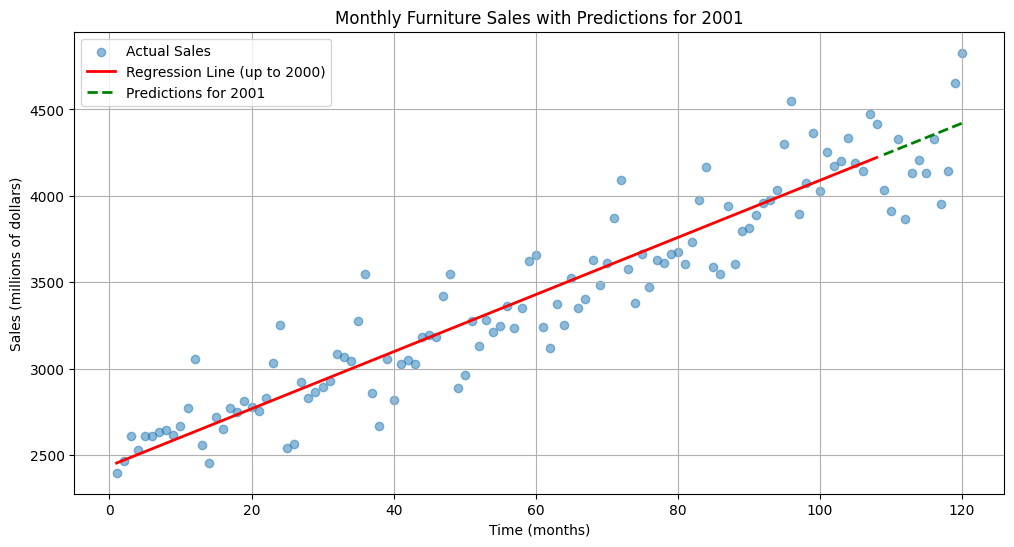

    Actual    Predicted
0     4032  4238.075459
1     3909  4254.605216
2     4326  4271.134973
3     3866  4287.664730
4     4129  4304.194487
5     4207  4320.724243
6     4134  4337.254000
7     4326  4353.783757
8     3954  4370.313514
9     4142  4386.843271
10    4655  4403.373028
11    4828  4419.902785


In [22]:
# Filter data up to December 2000
furniture_2000 = furniture[furniture['time'] <= 108]  # 108 months from Jan 1992 to Dec 2000

# Run regression on data up to 2000
X_2000 = sm.add_constant(furniture_2000['time'])
model_2000 = sm.OLS(furniture_2000['sales'], X_2000).fit()

# Predict for 2001
time_2001 = range(109, 121)
X_2001 = sm.add_constant(pd.Series(time_2001))
predictions_2001 = model_2000.predict(X_2001)

# Plot actual data, regression line, and predictions
plt.figure(figsize=(12, 6))
plt.scatter(furniture['time'], furniture['sales'], alpha=0.5, label='Actual Sales')
plt.plot(furniture_2000['time'], model_2000.predict(X_2000), color='red', linewidth=2, label='Regression Line (up to 2000)')
plt.plot(time_2001, predictions_2001, color='green', linewidth=2, linestyle='--', label='Predictions for 2001')
plt.title('Monthly Furniture Sales with Predictions for 2001')
plt.xlabel('Time (months)')
plt.ylabel('Sales (millions of dollars)')
plt.legend()
plt.grid(True)
plt.show()

# Compare predictions with actual values for 2001
actual_2001 = furniture[furniture['time'] > 108]['sales']
comparison = pd.DataFrame({'Actual': actual_2001.values, 'Predicted': predictions_2001})
print(comparison)

1. The predictions show a steady linear increase (green dashed line) while actual values have more variation.
2. The model doesn't capture seasonal patterns visible in the actual data
3. The linear relationship between time and sales remains constant
4. The rate of growth (slope) stays the same as in previous years

These results suggest that while the linear model captures the general upward trend, it misses important seasonal patterns in the data.

We have ignored two major issues here. First, all the variance formulas we used in class relied on independence, and so without independence, we can’t trust our inference. That’s why we haven’t looked at any intervals or tests, and focused only on prediction. The second thing we ignored was if there were any other time dependence patterns that we could capture. Is there any seasonality in the data? A Christmas bump in sales? These questions we will try to answer later in the course.

1. Regular fluctuations are visible throughout the series
2. Notable spikes appear at regular intervals
3. Particularly large peaks visible near the end of each year, suggesting Christmas sales effects